In [26]:
import math
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from main import nmf
np.random.seed(42)

In [27]:
%matplotlib inline

In [28]:
def zeros_mask(arr):
    m, n = arr.shape
    indices = np.random.choice(m * n, replace=False, size=int(m * n * 0.2))
    arr[np.unravel_index(indices, (m, n))] = 0
    return arr

In [29]:
mat = scipy.io.loadmat('Urban.mat')
X = mat['X']

In [30]:
m, n = X.shape # (162, 94249)
num_col = int(math.sqrt(n)) # 307

In [31]:
X3d = X.reshape(m, num_col, num_col, order='F') # order specified to match MATLAB

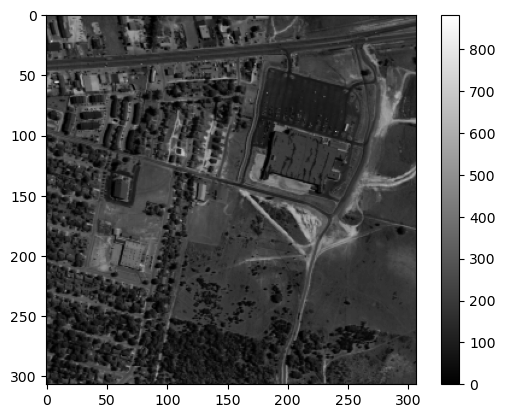

In [32]:
plt.imshow(X3d[100, :, :], cmap='gray')
plt.colorbar()

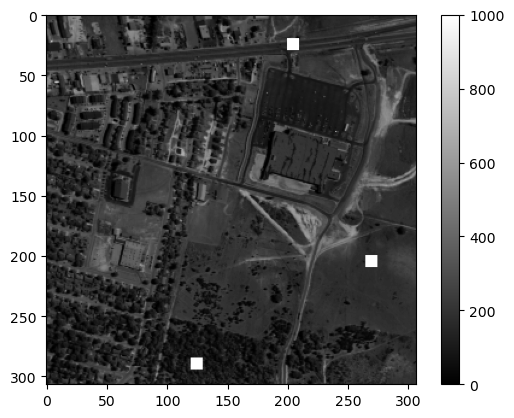

In [33]:
img = X3d[100, :, :].copy()
img[285: 295, 120: 130] = 1000 # trees
img[200: 210, 265: 275] = 1000 # grass
img[20: 30, 200: 210] = 1000 # asphalt
plt.imshow(img, cmap='gray')
plt.colorbar()

In [34]:
trees3d = X3d[:, 285: 295, 120: 130] # (162, 10, 10)
grass3d = X3d[:, 200: 210, 265: 275] # (162, 10, 10)
asphalt3d = X3d[:, 20: 30, 200: 210] # (162, 10, 10)

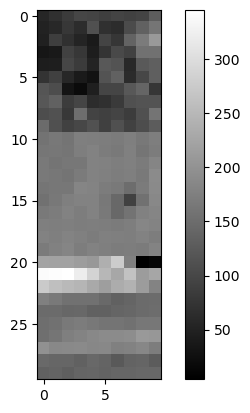

In [35]:
smallX3d = np.hstack([trees3d, grass3d, asphalt3d]) # (162, 30, 10)
plt.imshow(smallX3d[100, :, :], cmap='gray')
plt.colorbar()

In [36]:
smallX = smallX3d.reshape(m, -1, order='F') # (162, 300)

In [37]:
m,n = smallX.shape
r = 6
W_ini = zeros_mask(np.random.rand(m, r))
H_ini = zeros_mask(np.random.rand(r, n))

In [38]:
_lambda = 0.4
Wb, Hb, Wl, Hl, fscores, gscores = nmf(smallX, W_ini.copy(), H_ini.copy(), _lambda=_lambda, itermax=200)

Iteration: 1, f=4471.756714237439, g=1066.0889413985449,  total=4898.192290796857
Iteration: 2, f=3045.462596754039, g=955.4430073943204,  total=3427.6397997117674
Iteration: 3, f=2019.6388206929234, g=910.5544841956449,  total=2383.8606143711813
Iteration: 4, f=1685.0302243232977, g=858.9919716111971,  total=2028.6270129677766
Iteration: 5, f=1520.920725853584, g=820.4745271854744,  total=1849.1105367277737
Iteration: 6, f=1397.440638524832, g=790.5828990523131,  total=1713.6737981457572
Iteration: 7, f=1304.8323651914175, g=766.8057677223538,  total=1611.554672280359
Iteration: 8, f=1232.3719207581987, g=747.5928475069578,  total=1531.4090597609818
Iteration: 9, f=1174.3092931357132, g=731.691595933515,  total=1466.9859315091194
Iteration: 10, f=1128.4660360082196, g=718.1744633849228,  total=1415.7358213621887
Iteration: 11, f=1093.4411815153794, g=706.4507600236675,  total=1376.0214855248464
Iteration: 12, f=1066.8718404075958, g=696.1337758666741,  total=1345.3253507542654
Iterati

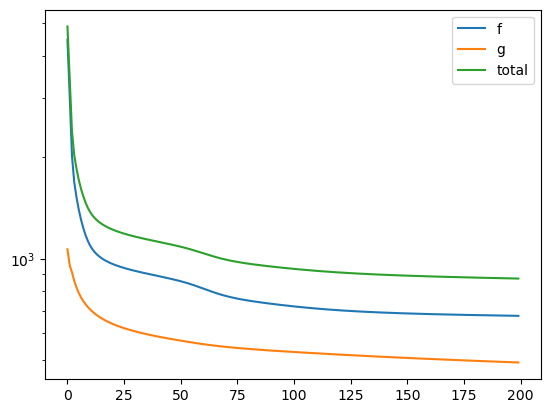

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_yscale('log')
ax.plot(fscores)
ax.plot(gscores)
ax.plot(fscores + _lambda * gscores)
ax.legend(['f', 'g', 'total'])

In [40]:
W_ins = Wl

n = np.ones(shape=(r, r)) * -1
for i in range(r):
    for j in range(r):
        n[i, j] = np.linalg.norm(W_ins[:, i] - W_ins[:, j])
    n[i, :] = n[i, :] / sum(n[i, :])
    print(n[i, :])


[0.         0.40032154 0.37096522 0.10068107 0.07906375 0.04896841]
[0.17375153 0.         0.24722214 0.18630924 0.20311204 0.18960506]
[0.18120784 0.27823482 0.         0.16950618 0.19044448 0.18060668]
[0.0924371  0.39410612 0.31859593 0.         0.10029777 0.09456308]
[0.07240591 0.42856094 0.35704356 0.10004363 0.         0.04194596]
[0.0487563  0.43495564 0.36813299 0.10255052 0.04560456 0.        ]


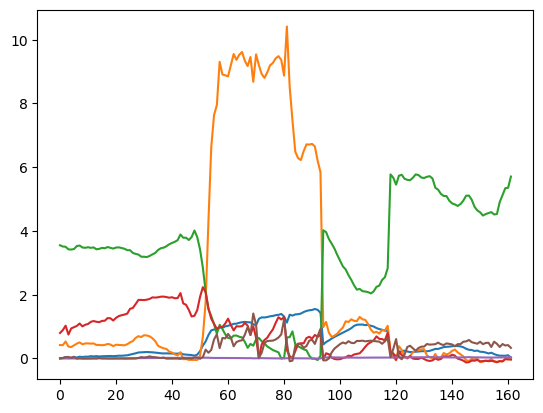

In [41]:
plt.plot(W_ins)

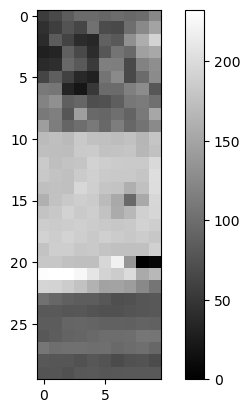

In [42]:
plt.imshow(Hl[0, :].reshape(30, 10, order='F'), cmap='gray')
plt.colorbar()

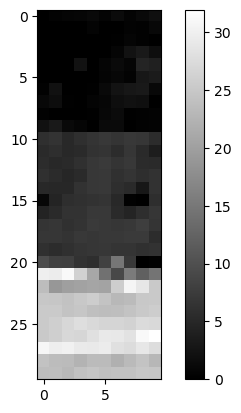

In [43]:
plt.imshow(Hl[2, :].reshape(30, 10, order='F'), cmap='gray')
plt.colorbar()